In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movie_titles = pd.read_csv("../data/Movie_Id_Titles.txt")

In [3]:
df['date'] = pd.to_datetime(df['timestamp'], unit="s")

In [4]:
#df.groupby(by=['user_id'])
a = df.sort_values(by=['user_id', 'date'])

In [5]:
u1 = a[a['user_id'] == 1]

In [6]:
u1['session'] = (u1['timestamp'] - u1['timestamp'].shift(1) > 60*20).fillna(0).cumsum(skipna=False)

/home/anton/anaconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
u1['rating'] = 0.5*(u1['rating'] - 3)

/home/anton/anaconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
!ls ../data

ml-100k  ml-100k.zip  Movie_Id_Titles.txt  u.data  u.item


In [10]:
#movie_info = pd.read_csv('../data/u.item', sep='|', encoding="ISO-8859-1", names=['idx', 'title', 'date', 'x', 'link', *range(19)])

In [11]:
df['rating_bin'] = df['rating'] > 3

In [12]:
from collections import defaultdict
#  current_consecutive = { user : { 'pos' : , 'neg' : } }
#  ratings_pos = { 'n_pos' : [ratings] }
#  ratings_neg = { 'n_neg' : [ratings] }
current_consecutive = {}
rating_pos = defaultdict(list)
rating_neg = defaultdict(list)

for i, row in df.sort_values('timestamp').iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating  = row['rating']
    ispositive = row['rating'] > 3
    
    if user_id not in current_consecutive:
        current_consecutive[user_id] = {
            'pos' : 0,
            'neg' : 0,
        }
    
    user = current_consecutive[user_id]
    
    if user['pos'] > 0:
        rating_pos[user['pos']].append(rating)
    if user['neg'] > 0:
        rating_neg[user['neg']].append(rating)
    
    if ispositive:
        if user['pos'] > 0:
            user['pos'] += 1
        else:
            user['pos'] = 1
            user['neg'] = 0        
    else:
        if user['neg'] > 0:
            user['neg'] += 1
        else:
            user['neg'] = 1
            user['pos'] = 0

In [13]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

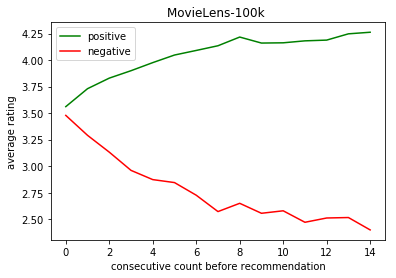

In [14]:
n = 15
plt.plot([ np.mean(v) for k, v in rating_pos.items()][:n], label='positive', color='green')
plt.plot([ np.mean(v) for k, v in rating_neg.items()][:n], label='negative', color='red')
plt.ylabel('average rating')
plt.xlabel('consecutive count before recommendation')
plt.title('MovieLens-100k ')
plt.legend();